In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
#Configurando o estilo a ser usado.
#plt.style.available
plt.style.use("seaborn-dark")

In [2]:
#upload do arquivo de dados
from google.colab import files
arq = files.upload()

Saving LeitoOcupacao.csv to LeitoOcupacao.csv


In [3]:
#Criando nosso DataFrame
df = pd.read_csv("LeitoOcupacao.csv")

In [4]:
#Visualizando as 5 primeiras linhas
df.head(2)


,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,VwEaXE5lcQ,2021-12-01T03:00:00.000Z,2010151,NaN,NaN,NaN,NaN,0,0,1,0,parse-cloud,_User$96xGofnlqq,Alagoas,São Miguel dos Campos,Alagoas,São Miguel dos Campos,False,False,2021-12-01T16:12:16.832Z,2021-12-02T10:57:58.996Z
1,tb3RdLMWSe,2021-12-01T03:00:09.514Z,2761114,NaN,NaN,NaN,NaN,0,0,0,0,parse-cloud,_User$XDgX2DBdzn,Minas Gerais,Alpinópolis,Minas Gerais,Alpinópolis,False,False,2021-12-01T16:15:20.409Z,2021-12-01T16:15:20.409Z


In [5]:
#Quantidade de linhas e colunas
df.shape

(97161, 21)

In [6]:
#Tipo de dados do dataframe
df.dtypes

_id                       object
dataNotificacao           object
cnes                      object
ocupacaoSuspeitoCli      float64
ocupacaoSuspeitoUti      float64
ocupacaoConfirmadoCli    float64
ocupacaoConfirmadoUti    float64
saidaSuspeitaObitos        int64
saidaSuspeitaAltas         int64
saidaConfirmadaObitos      int64
saidaConfirmadaAltas       int64
origem                    object
_p_usuario                object
estadoNotificacao         object
municipioNotificacao      object
estado                    object
municipio                 object
excluido                    bool
validado                    bool
_created_at               object
_updated_at               object
dtype: object

In [7]:
#Formatando campos data de Objeto para datetime
df["dataNotificacao"] = pd.to_datetime(df["dataNotificacao"])
df["_created_at"] = pd.to_datetime(df["_created_at"])
df["_updated_at"] = pd.to_datetime(df["_updated_at"])

In [8]:
#Tipo de dados do dataframe
df.dtypes

_id                                   object
dataNotificacao          datetime64[ns, UTC]
cnes                                  object
ocupacaoSuspeitoCli                  float64
ocupacaoSuspeitoUti                  float64
ocupacaoConfirmadoCli                float64
ocupacaoConfirmadoUti                float64
saidaSuspeitaObitos                    int64
saidaSuspeitaAltas                     int64
saidaConfirmadaObitos                  int64
saidaConfirmadaAltas                   int64
origem                                object
_p_usuario                            object
estadoNotificacao                     object
municipioNotificacao                  object
estado                                object
municipio                             object
excluido                                bool
validado                                bool
_created_at              datetime64[ns, UTC]
_updated_at              datetime64[ns, UTC]
dtype: object

In [9]:
df.head(2)

,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,VwEaXE5lcQ,2021-12-01 03:00:00+00:00,2010151,NaN,NaN,NaN,NaN,0,0,1,0,parse-cloud,_User$96xGofnlqq,Alagoas,São Miguel dos Campos,Alagoas,São Miguel dos Campos,False,False,2021-12-01 16:12:16.832000+00:00,2021-12-02 10:57:58.996000+00:00
1,tb3RdLMWSe,2021-12-01 03:00:09.514000+00:00,2761114,NaN,NaN,NaN,NaN,0,0,0,0,parse-cloud,_User$XDgX2DBdzn,Minas Gerais,Alpinópolis,Minas Gerais,Alpinópolis,False,False,2021-12-01 16:15:20.409000+00:00,2021-12-01 16:15:20.409000+00:00


In [10]:
df.describe()

,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas
count,0.0,0.0,0.0,0.0,97161.000000,97161.000000,97161.000000,97161.000000
mean,NaN,NaN,NaN,NaN,0.179866,0.705828,1.086393,6.330832
std,NaN,NaN,NaN,NaN,4.826936,16.762266,14.483499,126.002401
min,NaN,NaN,NaN,NaN,-2.000000,-5.000000,-1.000000,-1.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
max,NaN,NaN,NaN,NaN,714.000000,3292.000000,422.000000,6545.000000


In [11]:
#Filtrando os estados informados na notificações !
df["estado"].unique()

array(['Alagoas', 'Minas Gerais', 'Rio de Janeiro', 'Santa Catarina',
       'Paraná', 'Rio Grande do Sul', 'Rondônia', 'São Paulo',
       'Pernambuco', 'Ceará', 'Distrito Federal', 'Maranhão', 'Bahia',
       'Tocantins', 'Mato Grosso', 'Paraíba', 'Rio Grande do Norte',
       'Goiás', 'Pará', 'Roraima', 'Amapá', 'Amazonas',
       'Mato Grosso do Sul', 'Piauí', 'Sergipe', 'Espírito Santo', 'Acre'],
      dtype=object)

In [13]:
#Agrupando por estado e contando as ocorrências.
df.groupby(["estado"])["municipio"].count()

estado
Acre                     190
Alagoas                  644
Amapá                     93
Amazonas                1370
Bahia                   3364
Ceará                   3929
Distrito Federal         646
Espírito Santo          1315
Goiás                  16062
Maranhão                2068
Mato Grosso              740
Mato Grosso do Sul      1432
Minas Gerais           16927
Paraná                  4701
Paraíba                  606
Pará                     851
Pernambuco              4209
Piauí                   1052
Rio Grande do Norte     1211
Rio Grande do Sul       1782
Rio de Janeiro          7122
Rondônia                 769
Roraima                   84
Santa Catarina          5680
Sergipe                  687
São Paulo              18810
Tocantins                817
Name: municipio, dtype: int64

In [12]:
#Agrupando os municipios por estado e contando as ocorrências.
df.groupby(["estado","municipio"])["municipio"].count()

estado     municipio            
Acre       Cruzeiro do Sul           79
           Marechal Thaumaturgo      41
           Rio Branco                70
Alagoas    Arapiraca                 17
           Maceió                   300
                                   ... 
Tocantins  Augustinópolis            72
           Gurupi                   207
           Miracema do Tocantins     83
           Palmas                    94
           Pedro Afonso              83
Name: municipio, Length: 1252, dtype: int64

In [14]:
#Separando por Ano e Mês
df["ano"] = df["dataNotificacao"].dt.year
df["mes"] = df["dataNotificacao"].dt.month

In [15]:
df.head()

,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at,ano,mes
0,VwEaXE5lcQ,2021-12-01 03:00:00+00:00,2010151,NaN,NaN,NaN,NaN,0,0,1,0,parse-cloud,_User$96xGofnlqq,Alagoas,São Miguel dos Campos,Alagoas,São Miguel dos Campos,False,False,2021-12-01 16:12:16.832000+00:00,2021-12-02 10:57:58.996000+00:00,2021,12
1,tb3RdLMWSe,2021-12-01 03:00:09.514000+00:00,2761114,NaN,NaN,NaN,NaN,0,0,0,0,parse-cloud,_User$XDgX2DBdzn,Minas Gerais,Alpinópolis,Minas Gerais,Alpinópolis,False,False,2021-12-01 16:15:20.409000+00:00,2021-12-01 16:15:20.409000+00:00,2021,12
2,Z4kzN3eKlF,2021-11-30 03:00:00+00:00,2269341,NaN,NaN,NaN,NaN,0,0,0,0,parse-cloud,_User$tQfONCxCE4,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,False,False,2021-12-01 16:17:55.340000+00:00,2021-12-01 16:17:55.340000+00:00,2021,11
3,ZaDTpKGy7W,2021-12-01 03:00:00+00:00,2269341,NaN,NaN,NaN,NaN,0,0,0,0,parse-cloud,_User$tQfONCxCE4,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,False,False,2021-12-01 16:18:06.519000+00:00,2021-12-01 16:18:06.519000+00:00,2021,12
4,Y8qSbeztda,2021-11-30 03:00:00+00:00,2301830,NaN,NaN,NaN,NaN,0,0,0,0,parse-cloud,_User$oQHDoCWxYV,Santa Catarina,Caçador,Santa Catarina,Caçador,False,False,2021-12-01 16:18:29.358000+00:00,2021-12-01 16:18:29.358000+00:00,2021,11


In [16]:
#Agrupando ocorrencias por estado, ano
df.groupby(["ano","estado"])["municipio"].count()

ano   estado        
1985  Rio de Janeiro        1
1991  Paraná                1
2000  Minas Gerais          1
2002  Maranhão              3
      Minas Gerais          1
                        ...  
2022  Roraima              10
      Santa Catarina     3682
      Sergipe             468
      São Paulo         13288
      Tocantins           423
Name: municipio, Length: 75, dtype: int64

In [17]:
#Agrupando os municipios por estado e contando as ocorrências.
df.groupby(["estado"])["municipio"].count().sort_values(ascending=True)

estado
Roraima                   84
Amapá                     93
Acre                     190
Paraíba                  606
Alagoas                  644
Distrito Federal         646
Sergipe                  687
Mato Grosso              740
Rondônia                 769
Tocantins                817
Pará                     851
Piauí                   1052
Rio Grande do Norte     1211
Espírito Santo          1315
Amazonas                1370
Mato Grosso do Sul      1432
Rio Grande do Sul       1782
Maranhão                2068
Bahia                   3364
Ceará                   3929
Pernambuco              4209
Paraná                  4701
Santa Catarina          5680
Rio de Janeiro          7122
Goiás                  16062
Minas Gerais           16927
São Paulo              18810
Name: municipio, dtype: int64

''

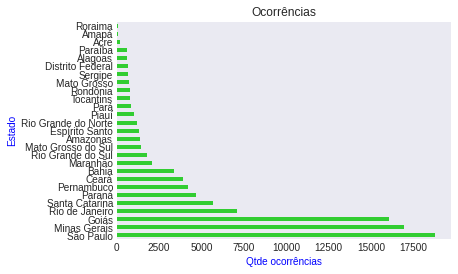

In [18]:
#Gráfico de barras notificações por estado 
df.groupby(["estado"])["municipio"].count().sort_values(ascending=False).plot.barh(title="Ocorrências" , color='limegreen')
plt.xlabel("Qtde ocorrências", color='blue')
plt.ylabel("Estado", color='blue')
;


''

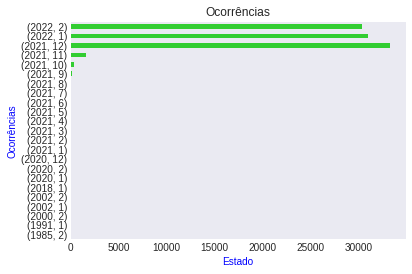

In [ ]:
#Gráfico de ocorrências por ano/mês 
df.groupby(["ano", "mes"])["estado"].count().plot.barh(title="Ocorrências" , color='limegreen')
plt.xlabel("Estado", color='blue')
plt.ylabel("Ocorrências", color='blue')
;

In [ ]:
#Criando Dataframe somente com o ultimo trimestre.
df202112 = df.loc[(df["ano"]>= 2021) & (df["mes"] >= 12 )]
df202201 = df.loc[(df["ano"]>= 2022) & (df["mes"] >= 1 )]

# Concatenando os arquivos criados em um unico.
dfTrimestre = pd.concat([df202112, df202201])

In [ ]:
#Verficando linha e colunas.
dfTrimestre.shape

(94673, 23)

Text(0, 0.5, 'Ano ')

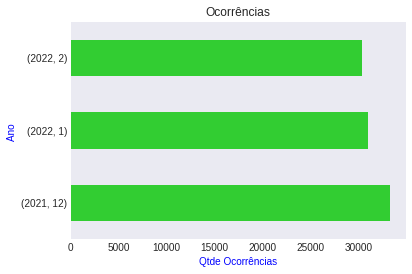

In [ ]:
#Gerando gráfico de barras do último trimestre
dfTrimestre.groupby(["ano", "mes"])["estado"].count().sort_values(ascending=False).plot.barh(title="Ocorrências", color="limegreen")
plt.xlabel("Quantidade Ocorrências", color='blue')
plt.ylabel("Ano Mêss ", color='blue')